<a href="https://colab.research.google.com/github/SanDBoom/Demo_html/blob/main/Crop_Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
import os
os.popen("pip install geopandas")
# os.popen("pip install neuralprophet")
os.popen("pip install keplergl")
os.popen("pip install shiny")

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
from shapely import wkt
from keplergl import KeplerGl

# from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
from datetime import datetime as d
from dateutil.relativedelta import relativedelta
plt.rcParams["figure.figsize"] = (80,13)

In [ ]:
df_crop=pd.read_csv("/content/cropData_Final.csv")
gdf_districts=pd.read_csv("/content/districts-map.csv")

In [ ]:
df_crop.head(2)

,District_Name,Crop_Year,Season,Crop,Area,Production,T2M,RH2M,PREC,PAR
0,ARIYALUR,2008,Whole Year,Cashewnut,31113,31113,27.56,73.44,3.45,103.70
1,ARIYALUR,2009,Whole Year,Sugarcane,6970,809944,28.45,68.62,2.63,104.02


In [ ]:
gdf_districts.head(2)

,District,geometry
0,Ariyalur,"POLYGON ((79.1913277494761 11.23154514549213, ..."
1,Chennai,"POLYGON ((80.25292639193947 12.98035179290099,..."


In [ ]:
gdf_districts['geometry'] = gdf_districts['geometry'].apply(wkt.loads)
gdf_districts = gpd.GeoDataFrame(gdf_districts, geometry = 'geometry')

In [ ]:
df_crop['District_Name'].unique()

array(['ARIYALUR', 'CHENGALPATTU', 'COIMBATORE', 'CUDDALORE',
       'DHARMAPURI', 'DINDIGUL', 'ERODE', 'KALLAKURICHI', 'KANCHEEPURAM',
       'KANYAKUMARI', 'KARUR', 'KRISHNAGIRI', 'MADURAI', 'MAYILADUTHURAI',
       'NAGAPATTINAM', 'NAMAKKAL', 'PERAMBALUR', 'PUDUKKOTTAI',
       'RAMANATHAPURAM', 'RANIPET', 'SALEM', 'SIVAGANGAI', 'TENKASI',
       'THANJAVUR', 'THE NILGIRIS', 'THENI', 'THIRUVALLUR', 'THIRUVARUR',
       'TIRUCHIRAPPALLI', 'TIRUNELVELI', 'TIRUPATHUR', 'TIRUPPUR',
       'TIRUVANNAMALAI', 'THOOTHUKKUDI', 'VELLORE', 'VILUPPURAM',
       'VIRUDHUNAGAR'], dtype=object)

In [ ]:
gdf_districts['District'].unique()

array(['Ariyalur', 'Chennai', 'Coimbatore', 'Cuddalore', 'Dharmapuri',
       'Dindigul', 'Erode', 'Kancheepuram', 'Kanniyakumari', 'Karur',
       'Krishnagiri', 'Madurai', 'Nagapattinam', 'Namakkal', 'Perambalur',
       'Pudukkottai', 'Ramanathapuram', 'Salem', 'Sivaganga', 'Thanjavur',
       'The Nilgiris', 'Theni', 'Thiruvallur', 'Thiruvarur',
       'Thoothukkudi', 'Tiruchirappalli', 'Tirunelveli', 'Tiruppur',
       'Tiruvannamalai', 'Vellore', 'Viluppuram', 'Virudhunagar'],
      dtype=object)

In [ ]:
def caps_to_normal(district_name: str):
    return district_name.title()

df_crop['District']=df_crop['District_Name'].apply(caps_to_normal)
gdf_districts['District']=gdf_districts['District'].apply(caps_to_normal)
df_crop.drop(columns=['District_Name'],inplace=True)

### *Renaming districts*

In [ ]:
def rename_districts(district_name):
    to_rename={
        'Thoothukkudi' : 'Thoothukudi',
        'Tirunelveli' : 'Thirunelveli',
        'Tiruchirappalli' : 'Trichirappalli',
        'Pudukkottai' : 'Pudukottai',
        'Sivaganga':'Sivagangai',
        'Kanniyakumari':'Kanyakumari'
    }
    if district_name in to_rename:
        return to_rename[district_name]
    return district_name

df_crop['District']=df_crop['District'].apply(rename_districts)
gdf_districts['District']=gdf_districts['District'].apply(rename_districts)

In [ ]:
districts_one=df_crop['District'].unique()
districts_two=gdf_districts['District'].unique()

print(set(districts_one).difference(districts_two))
print(set(districts_two).difference(districts_one))

{'Ranipet', 'Chengalpattu', 'Tenkasi', 'Kallakurichi', 'Tirupathur', 'Mayiladuthurai'}
{'Chennai'}


# Visualizing crop production on given year

# *Rice Production on 2013*

In [ ]:
df_crop_rice=df_crop.loc[df_crop['Crop']=='Rice']
gdf_crop_rice_year=pd.merge(df_crop_rice,gdf_districts,on='District',how='outer')

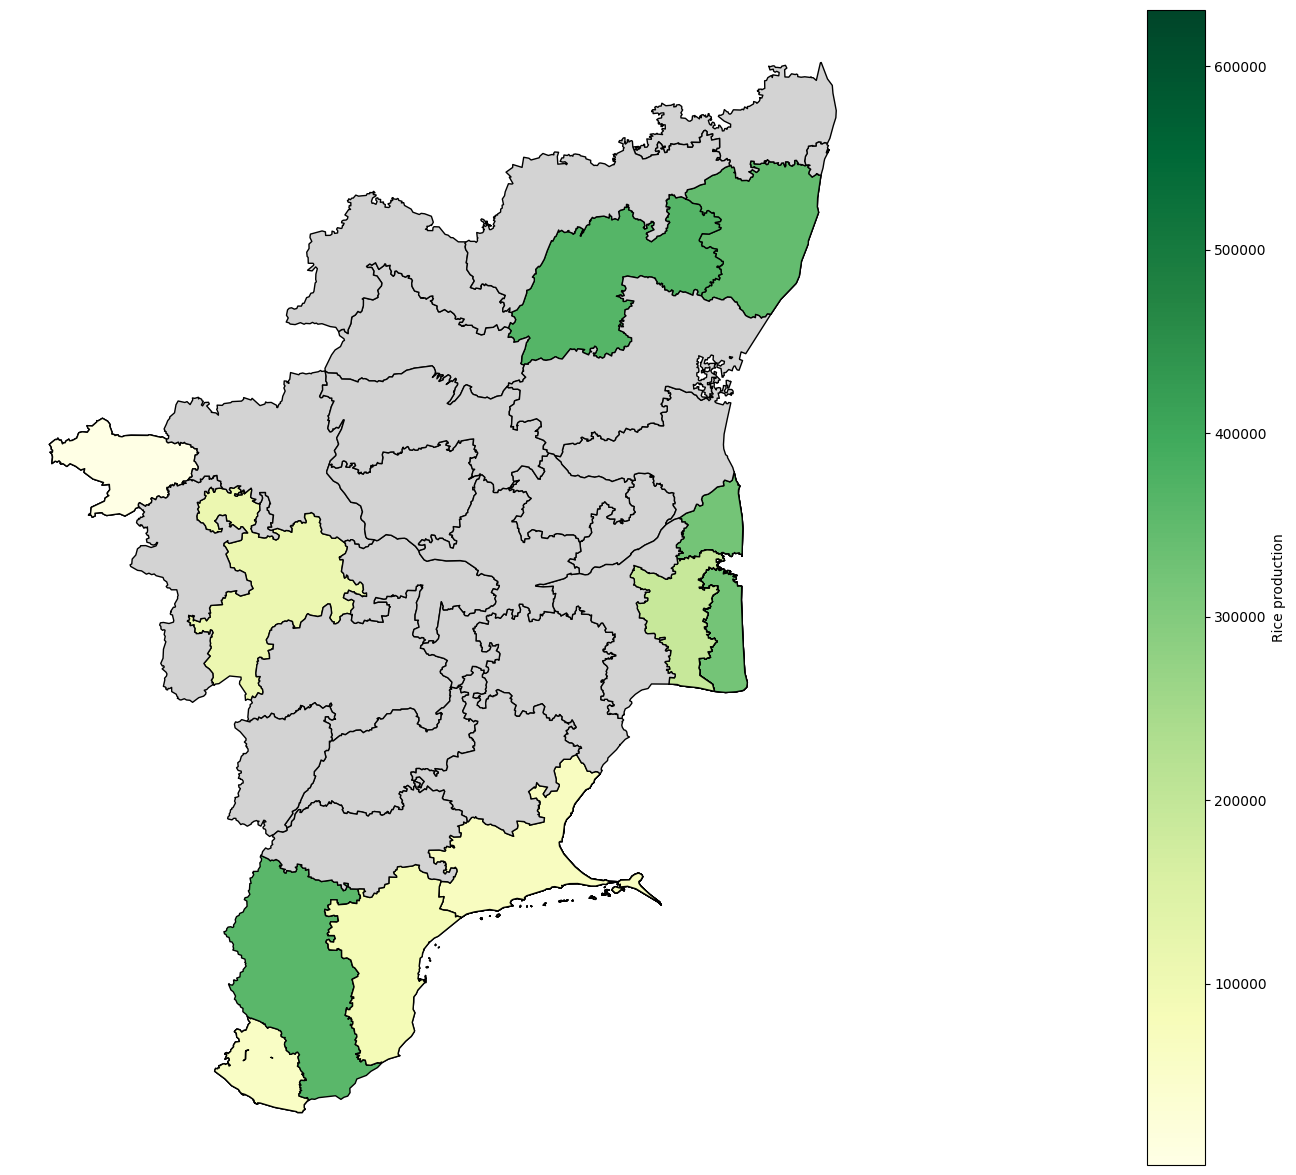

In [ ]:
gpd.GeoDataFrame(gdf_crop_rice_year, geometry = 'geometry').plot(column='Production',cmap='YlGn',
                                                                 legend=True,missing_kwds={"color": "lightgrey"},
                                                                 legend_kwds={'label': "Rice production",'orientation': "vertical"},
                                                                 edgecolor='k',figsize=(70, 15)).set_axis_off()

In [ ]:
loc_data = pd.read_csv('/content/TN_District_Lat_Lon.csv')
loc_data.head(2)

,DISTRICT,STATE,LATITUDE,LONGITUDE
0,Ariyalur,TAMIL NADU,11.1401,79.0786
1,Chengalpattu,TAMIL NADU,12.6819,79.9888


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
# from google.colab import output
# output.disable_custom_widget_manager()

In [ ]:
map = KeplerGl(height=600, width=800)
map

In [ ]:
# for i in range(len(loc_data)):
#   !curl -X GET "https://power.larc.nasa.gov/api/temporal/monthly/point?start=2001&end=2013&latitude={loc_data.LATITUDE[i]}&longitude={loc_data.LONGITUDE[i]}&community=ag&parameters=ALLSKY_SFC_PAR_TOT%2CPRECTOTCORR%2CRH2M%2CT2M&format=csv&header=false&time-standard=lst" -H "accept: application/json" > "/content/{loc_data.DISTRICT[i]}.csv"

In [ ]:
# !zip -r /content/Parameter.zip /content/Parameter
# from google.colab import files
# files.download("/content/Parameter.zip")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
from datetime import datetime
import random
import json

In [ ]:
# Load the dataset
data = pd.read_csv('/content/cropData_Final.csv')
# data = pd.read_csv('/content/cropData.csv')

###Label encoding


In [ ]:
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

#le1.fit(data['Season'])
#list(le1.classes_)
data['Season'] = le1.fit_transform(data['Season'])
list(le1.classes_)
# data['Season'] = pd.DataFrame([101 if i else 100 for i in data['Season']])

data['District_Name']=le2.fit_transform(data['District_Name'])
list(le2.classes_)

data['Crop'] = le3.fit_transform(data['Crop'])
list(le3.classes_)

data.dropna(inplace=True)

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(data.drop('Crop', axis=1), data['Crop'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
data.head()

,District_Name,Crop_Year,Season,Crop,Area,Production,T2M,RH2M,PREC,PAR
0,0,2008,1,2,31113,31113,27.56,73.44,3.45,103.70
1,0,2009,1,7,6970,809944,28.45,68.62,2.63,104.02
2,0,2010,1,7,7500,739006,27.98,73.69,3.50,99.88
3,0,2011,1,3,323,2600000,27.92,71.38,2.79,104.11
4,0,2012,1,7,7804,707584,28.23,70.06,2.35,104.76


### C4.5 *ALGORITHM*

In [ ]:
# Create a decision tree classifier using the C4.5 algorithm
clf = DecisionTreeClassifier(criterion='entropy') #hyperparameter tuning

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.9839857651245552


# XGBoost

### XGBoost Hyper parameter Tuning

In [ ]:
# Convert the training and testing data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the initial parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification objective
    'num_class': len(data['Crop'].unique()),  # Number of classes
    'seed': 42,  # Random seed for reproducibility
}

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'eta': [0.1, 0.2, 0.3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(**params)

grid_search = GridSearchCV(
    estimator = xgb_model,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Model Parameter: {best_params}")
print(f"Best Model: {best_model}")

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")

Best Model Parameter: {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0, 'max_depth': 5, 'subsample': 0.8}
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=10, num_parallel_tree=None, ...)
Best Model Accuracy: 0.99644128113879


### XGBoost algorithm

In [ ]:
# Convert the training and testing data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multiclass classification objective
    'num_class': len(data['Crop'].unique()),  # Number of classes
    'max_depth': 4,  # Maximum tree depth
    'eta': 0.3,  # Learning rate
    'seed': 42,  # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.994661921708185


In [ ]:
clf.predict(data.head().drop('Crop', axis=1))

array([2, 7, 7, 3, 7])

In [ ]:
best_model.predict(data.head().drop('Crop', axis=1))

array([2, 7, 7, 3, 7], dtype=int32)

In [ ]:
df_crop['District'].unique()

array(['Ariyalur', 'Chengalpattu', 'Coimbatore', 'Cuddalore',
       'Dharmapuri', 'Dindigul', 'Erode', 'Kallakurichi', 'Kancheepuram',
       'Kanyakumari', 'Karur', 'Krishnagiri', 'Madurai', 'Mayiladuthurai',
       'Nagapattinam', 'Namakkal', 'Perambalur', 'Pudukottai',
       'Ramanathapuram', 'Ranipet', 'Salem', 'Sivagangai', 'Tenkasi',
       'Thanjavur', 'The Nilgiris', 'Theni', 'Thiruvallur', 'Thiruvarur',
       'Trichirappalli', 'Thirunelveli', 'Tirupathur', 'Tiruppur',
       'Tiruvannamalai', 'Thoothukudi', 'Vellore', 'Viluppuram',
       'Virudhunagar'], dtype=object)

In [ ]:
data['District_Name'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 28,
       34, 35, 36])

In [ ]:
def dateAfterMonths (months):
  return d.date(d.today()) + relativedelta(months=+months)

def month_to_season(months):
  if dateAfterMonths(months).month in [5,6,7]:
    return 0
  else:
    return 1

print(dateAfterMonths(0))
print(dateAfterMonths(12))

2023-06-23
2024-06-23


In [ ]:
tod_wea = os.popen(f'curl -X GET "https://api.open-meteo.com/v1/forecast?latitude=13.04&longitude=80.20&hourly=temperature_2m,relativehumidity_2m,precipitation,terrestrial_radiation_instant" -H "accect:application/json"').read()
tod_wea = json.loads(tod_wea)
[tod_wea['hourly'][i][7] for i in tod_wea['hourly'].keys()][1:]

[34.0, 57, 0.0, 1297.9]

In [ ]:
wea = os.popen(f'curl -X GET "https://climate-api.open-meteo.com/v1/climate?latitude=52.52&longitude=13.41&start_date=2023-06-22&end_date=2024-06-22&daily=temperature_2m_mean,shortwave_radiation_sum,relative_humidity_2m_mean,precipitation_sum&models=FGOALS_f3_H&min=2023-06-22&max=2023-09-22" -H "accect:application/json"').read()
wea = json.loads(wea)
[wea['daily'][i][wea['daily']['time'].index(str(dateAfterMonths(0)))] for i in wea['daily'].keys()][1:]

[17.5, 19.2, 71, 0.16]

In [ ]:
def getParam (months):
  new = pd.DataFrame()
  new['District_Name'] = df_crop['District'].unique()
  new['Crop_Year'] = pd.DataFrame([dateAfterMonths(months).year for i in new['District_Name']])
  new['Season'] = pd.DataFrame([month_to_season(months) for i in new['District_Name']])
  new['Area'] = pd.DataFrame([random.choice(data['Area']) for i in new['District_Name']])
  new['Production'] = pd.DataFrame([random.choice(data['Production']) for i in new['District_Name']])
  new_param = list()
  for i in df_crop['District'].unique():
    index = list(loc_data['DISTRICT']).index(i)
    wea = os.popen(f'curl -X GET "https://climate-api.open-meteo.com/v1/climate?latitude={loc_data.LATITUDE[index]}&longitude={loc_data.LONGITUDE[index]}&start_date=2023-06-22&end_date=2024-06-22&daily=temperature_2m_mean,shortwave_radiation_sum,relative_humidity_2m_mean,precipitation_sum&models=FGOALS_f3_H&min={str(dateAfterMonths(0))}&max={str(dateAfterMonths(months))}" -H "accect:application/json"').read()
    wea = json.loads(wea)
    new_param.append([wea['daily'][i][wea['daily']['time'].index(str(dateAfterMonths(0)))] for i in wea['daily'].keys()][1:])
  new_param = pd.DataFrame(new_param)
  new['T2M'] = new_param[0]
  new['RH2M'] = new_param[2]
  new['PREC'] = new_param[3]
  new['PAR'] = new_param[1]
  new['District_Name'] = le2.fit_transform(new['District_Name'])
  return new

In [ ]:
def getPred (months):
  prediction = pd.DataFrame()
  prediction['District'] = df_crop['District'].unique()
  # prediction['Crop'] = clf.predict(new)
  prediction['Crop'] = best_model.predict(getParam(months))
  prediction['Crop'] = [le3.classes_[int(i)] for i in prediction['Crop']]
  return prediction

In [ ]:
clf.predict([[1,2023,100,91020,331434,28.17,72.19,3.19,104.02],[1,2023,100,95739,378628,27.90,76.38,3.91,97.98]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([6, 6])

# ***Map coloring***

In [ ]:
def getMap (months):
  gdf_pred=pd.merge(getPred(months),gdf_districts,on='District',how='outer')

  # Define a list of categorical colors
  colors = plt.cm.tab20.colors

  # Select a random subset of colors
  n_colors = len(gdf_pred['Crop'].dropna().unique())
  random_color_indices = np.random.choice(range(len(colors)), n_colors, replace=False)
  random_colors = [colors[i] for i in random_color_indices]

  # Plot the data using a categorical color map
  ax = gpd.GeoDataFrame(gdf_pred, geometry='geometry').plot(column='Crop', categorical=True, legend=True,
                                                            cmap=plt.cm.colors.ListedColormap(random_colors),
                                                            edgecolor='k', figsize=(70, 15))
  ax.set_title(f"Crop Prediction Map for {str(dateAfterMonths(months))}")
  # plt.show()
  return ax

In [ ]:
getMap(3)

#SHINY UI

In [ ]:
# !pip install shiny
from shiny import App, render, ui
import matplotlib.pyplot as plt
import numpy as np

app_ui = ui.page_fluid(
    ui.panel_title("Simulate a normal distribution"),

    ui.layout_sidebar(

      ui.panel_sidebar(
        ui.input_numeric("monthip", "Months After", 1),
      ),

      ui.panel_main(
        ui.output_plot("plot")
      ),
    ),
)

def server(input, output, session):

    @output
    @render.plot
    def plot() -> object:
        ax = getMap(input.monthip())
        return ax

app = App(app_ui, server)